# Importing necessary libraries and reading the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('songs.csv', index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [6]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
df['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
98         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [8]:
# Dropping songs whose popularity is 0 as they will create noise
df = df[df['popularity']!= 0]
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97980 entries, 0 to 97979
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          97980 non-null  object 
 1   artists           97980 non-null  object 
 2   album_name        97980 non-null  object 
 3   track_name        97980 non-null  object 
 4   popularity        97980 non-null  int64  
 5   duration_ms       97980 non-null  int64  
 6   explicit          97980 non-null  bool   
 7   danceability      97980 non-null  float64
 8   energy            97980 non-null  float64
 9   key               97980 non-null  int64  
 10  loudness          97980 non-null  float64
 11  mode              97980 non-null  int64  
 12  speechiness       97980 non-null  float64
 13  acousticness      97980 non-null  float64
 14  instrumentalness  97980 non-null  float64
 15  liveness          97980 non-null  float64
 16  valence           97980 non-null  float6

In [9]:
# Checking and Duplicate rows
df.duplicated().sum()

np.int64(274)

In [10]:
df.drop_duplicates(inplace= True)

In [11]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,97706.000000,9.770600e+04,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000
mean,38.727980,2.304192e+05,0.565840,0.646196,5.305641,-8.253242,0.634516,0.086412,0.310209,0.164368,0.217971,0.468802,122.700009,3.906239
std,19.178611,1.097183e+05,0.172573,0.250041,3.553363,4.971954,0.481568,0.110197,0.329435,0.315694,0.195867,0.258562,29.957132,0.432686
min,1.000000,2.426600e+04,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.755342e+05,0.456000,0.476000,2.000000,-10.046000,0.000000,0.035800,0.014600,0.000000,0.098500,0.255000,99.969000,4.000000
50%,39.000000,2.154335e+05,0.578000,0.687000,5.000000,-7.065000,1.000000,0.049000,0.166000,0.000059,0.133000,0.455000,122.778000,4.000000
75%,53.000000,2.653815e+05,0.693000,0.858000,8.000000,-5.025000,1.000000,0.085600,0.588000,0.071675,0.280000,0.675000,141.106500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# Frequency encoding 'track_genre' column

In [12]:
df['track_genre'].value_counts()

track_genre
sertanejo         999
forro             998
j-idol            997
pop-film          997
detroit-techno    997
                 ... 
latin             405
soul              389
romance           349
iranian           340
jazz              318
Name: count, Length: 114, dtype: int64

In [13]:
genre_freq = df['track_genre'].value_counts()
df['track_genre_freq'] = df['track_genre'].map(genre_freq)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,944
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,944
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,944
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,944
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,944


# Creating column 'duration_s' from 'duration_ms'

In [14]:
df['duration_s'] = df['duration_ms'].apply(lambda x: x/1000)
df.drop('duration_ms', axis = 1, inplace = True)
df.head()

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_freq,duration_s
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,944,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,-17.235,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,944,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,-9.734,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,944,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,-18.515,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,944,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,-9.681,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,944,198.853


# Exploratory Data Analysis

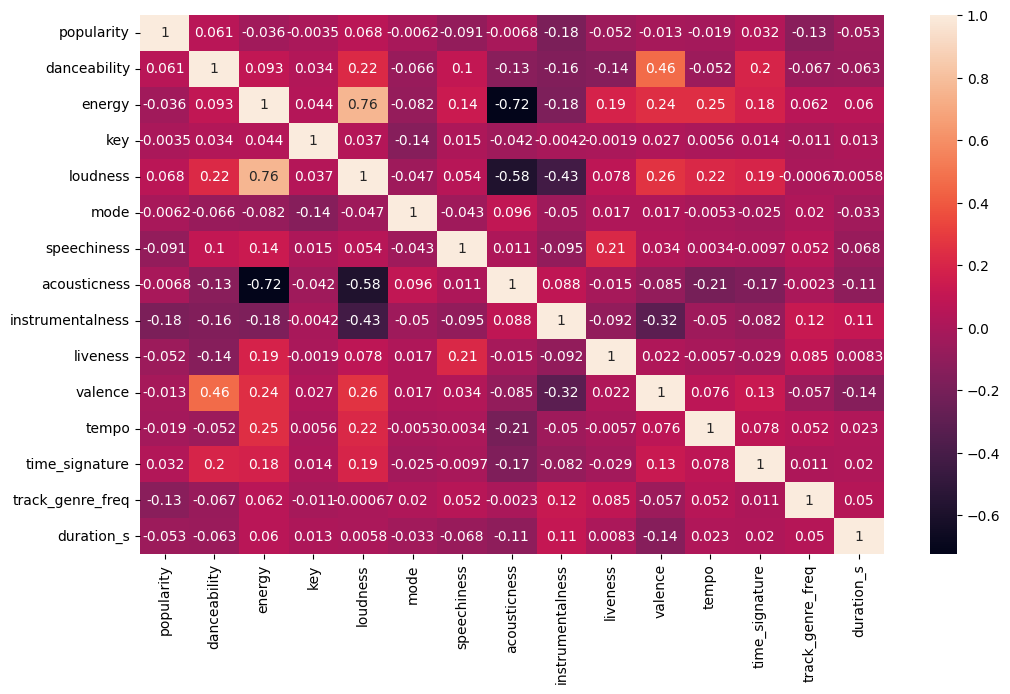

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True)
plt.show()

In [17]:
# Creating new columns
df['dance_valence'] = df['danceability'] * df['valence']
df['energy_loudness'] = df['energy'] * df['loudness']
df['speech_liveness'] = df['speechiness'] * df['liveness']
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_freq,duration_s,dance_valence,energy_loudness,speech_liveness
count,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000,97706.000000
mean,38.727980,0.565840,0.646196,5.305641,-8.253242,0.634516,0.086412,0.310209,0.164368,0.217971,0.468802,122.700009,3.906239,891.690091,230.419212,0.285959,-4.391005,0.023419
std,19.178611,0.172573,0.250041,3.553363,4.971954,0.481568,0.110197,0.329435,0.315694,0.195867,0.258562,29.957132,0.432686,138.882616,109.718261,0.196894,1.905828,0.068877
min,1.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,24.266000,0.000000,-33.694192,0.000000
25%,23.000000,0.456000,0.476000,2.000000,-10.046000,0.000000,0.035800,0.014600,0.000000,0.098500,0.255000,99.969000,4.000000,858.000000,175.534250,0.121518,-5.271008,0.004295
50%,39.000000,0.578000,0.687000,5.000000,-7.065000,1.000000,0.049000,0.166000,0.000059,0.133000,0.455000,122.778000,4.000000,952.000000,215.433500,0.252464,-4.165392,0.007945
75%,53.000000,0.693000,0.858000,8.000000,-5.025000,1.000000,0.085600,0.588000,0.071675,0.280000,0.675000,141.106500,4.000000,984.000000,265.381500,0.424252,-3.256794,0.019493
max,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,999.000000,5237.295000,0.958432,4.527468,0.939720


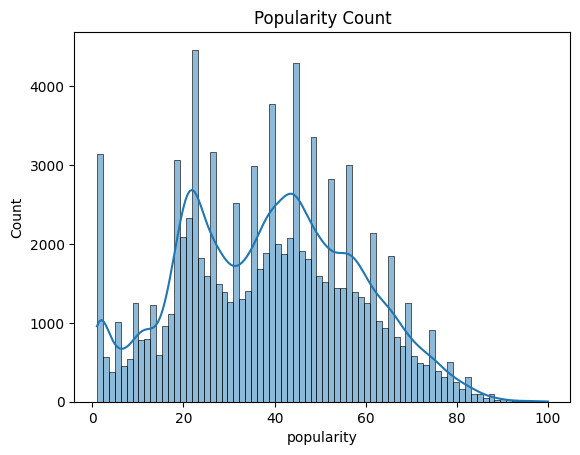

In [18]:
sns.histplot(data = df, x = 'popularity', kde= True)
plt.title("Popularity Count")
plt.show()

C:\Users\Poorvaja\AppData\Local\Temp\ipykernel_17964\2815252290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_artists.values , y = top_artists.index, palette= 'cividis')


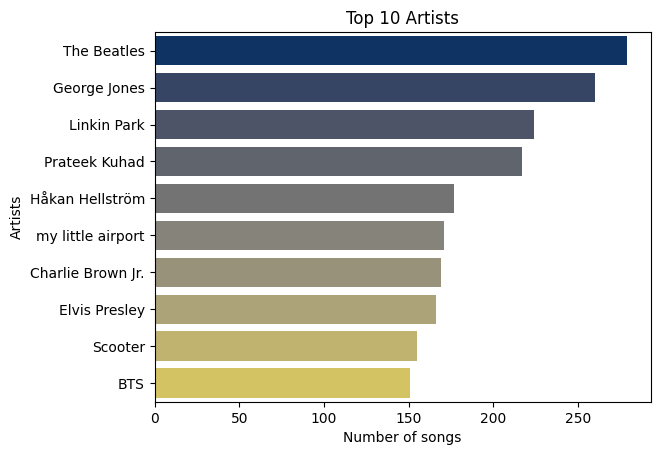

In [20]:
top_artists = df['artists'].value_counts().head(10)
sns.barplot(x = top_artists.values , y = top_artists.index, palette= 'cividis')
plt.xlabel('Number of songs')
plt.ylabel('Artists')
plt.title('Top 10 Artists')
plt.show()

C:\Users\Poorvaja\AppData\Local\Temp\ipykernel_17964\1420308528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_genres.values, y = top_genres.index, palette= 'viridis')


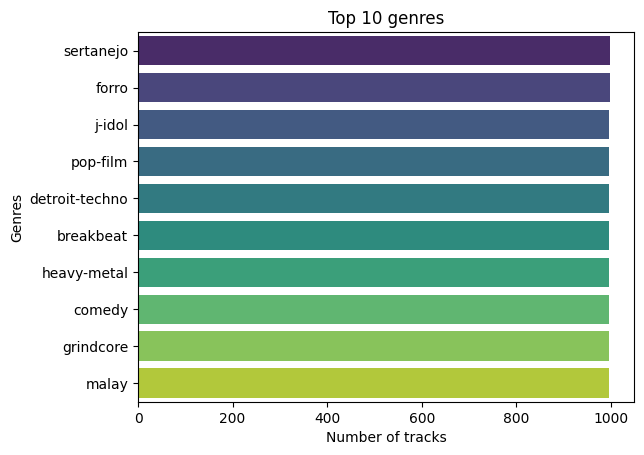

In [21]:
top_genres = df['track_genre'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x = top_genres.values, y = top_genres.index, palette= 'viridis')
plt.title('Top 10 genres')
plt.xlabel('Number of tracks')
plt.ylabel('Genres')
plt.show()

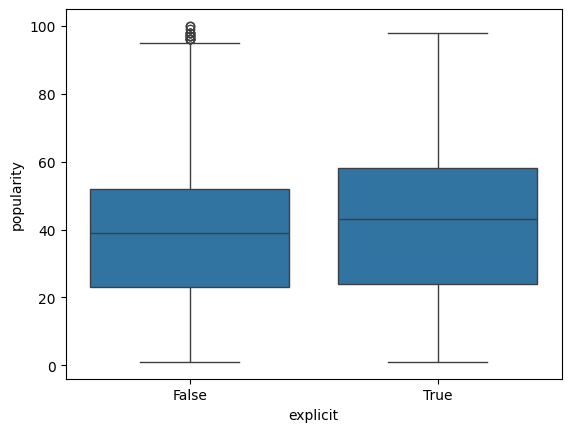

In [22]:
sns.boxplot(x='explicit', y='popularity', data=df)
plt.show()

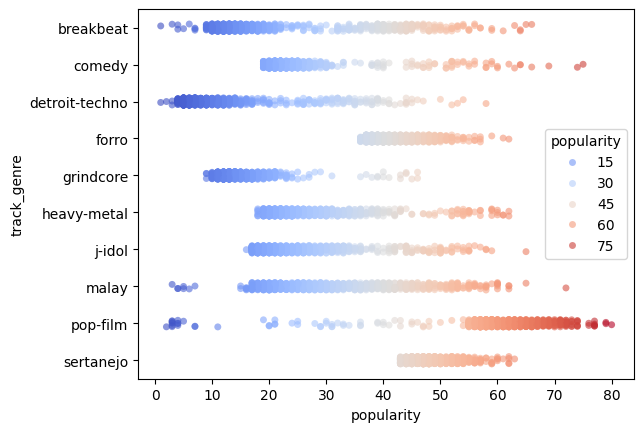

In [23]:
genre_df = df[df['track_genre'].isin(top_genres.index)]
sns.stripplot( x = 'popularity', y = 'track_genre',data = genre_df ,hue = 'popularity', palette='coolwarm', alpha = 0.6)
plt.show()

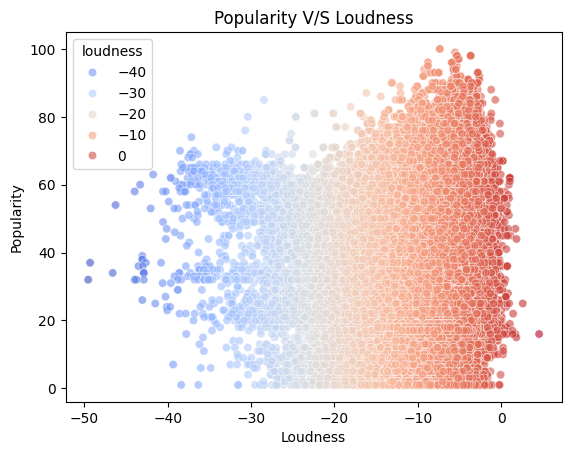

In [24]:
sns.scatterplot(x = 'loudness', y = 'popularity', data = df,hue = 'loudness', palette= 'coolwarm', alpha=0.6)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Popularity V/S Loudness')
plt.show()

# Model training and evaluation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [26]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'track_genre_freq',
       'duration_s', 'dance_valence', 'energy_loudness', 'speech_liveness'],
      dtype='object')

In [27]:
X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'popularity','track_genre'], axis=1)
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# 1. Linear Regression
linmod = LinearRegression()
linmod.fit(X_train_scaled,y_train)
predlin = linmod.predict(X_test_scaled)
print('R2 Score: ', r2_score(y_test, predlin))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predlin))
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, predlin))

R2 Score:  0.07599429826245208
Mean Absolute Error:  14.967935102803935
Root Mean Squared Error:  18.417129224427434


In [29]:
# 2. Logistic Regression
logmod = LogisticRegression(max_iter= 2000)
logmod.fit(X_train_scaled,y_train)
predlog = logmod.predict(X_test_scaled)
print('R2 Score: ', r2_score(y_test, predlog))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predlog))
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, predlog))

R2 Score:  -1.0536260106458322
Mean Absolute Error:  19.689342248908297
Root Mean Squared Error:  27.456507141088544


In [30]:
# 3. Random Forest Regressor
rfr = RandomForestRegressor(n_estimators= 500, max_depth=15, n_jobs=-1)
rfr.fit(X_train,y_train)
predrfr = rfr.predict(X_test)
print('R2 Score: ', r2_score(y_test, predrfr))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predrfr))
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, predrfr))

R2 Score:  0.43149573729260904
Mean Absolute Error:  10.546083415522201
Root Mean Squared Error:  14.446128462222962


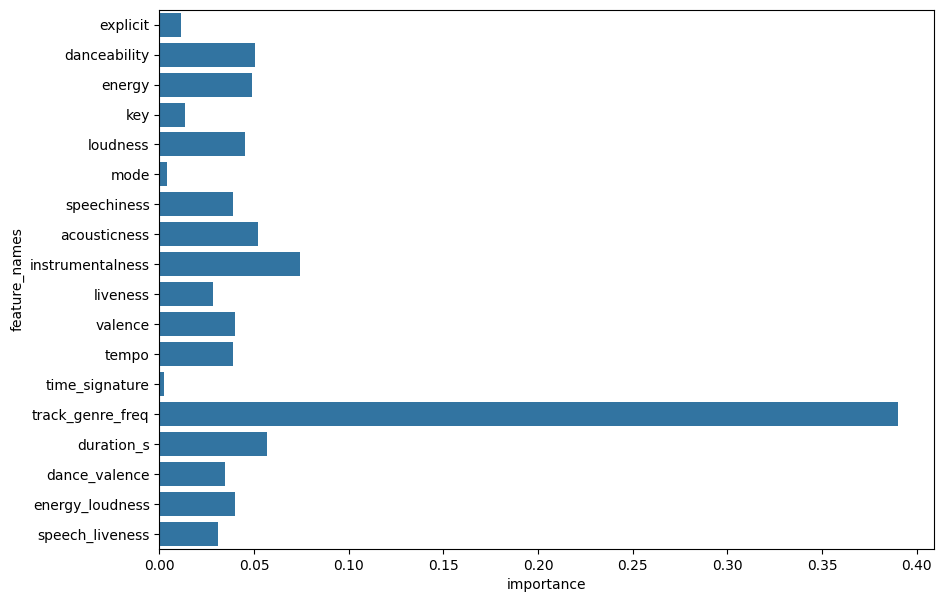

In [31]:
importances = pd.Series(rfr.feature_importances_)
feature_names = X.columns
importance_df = pd.DataFrame({'feature_names' : feature_names, 'importance' : importances})
importance_df.sort_values(by = 'importance',ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x = 'importance', y = 'feature_names', data = importance_df)
plt.show()

In [35]:
selected_features = importance_df[importance_df['importance']>=0.02]['feature_names']
selected_features.reset_index(drop= True, inplace= True)
X_reduced = X[selected_features]
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, random_state=101, test_size=0.3)
X_reduced

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre_freq,duration_s,dance_valence,energy_loudness,speech_liveness
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,944,230.666,0.483340,-3.109906,0.051194
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,944,149.610,0.112140,-2.861010,0.007706
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,944,210.826,0.052560,-3.494506,0.006517
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,944,201.933,0.038038,-1.103494,0.004792
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,944,198.853,0.103206,-4.288683,0.004361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97975,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,987,384.999,0.005831,-3.852355,0.003642
97976,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,987,385.000,0.006090,-2.143206,0.004210
97977,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,987,271.466,0.467347,-3.584455,0.003524
97978,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,987,283.893,0.242431,-5.509834,0.008019


In [36]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [300,400,500],
    'max_depth' : [10,15,20]
}
rfr = RandomForestRegressor(n_estimators=200)
grid = GridSearchCV(estimator= rfr, cv = 3, verbose = 2, n_jobs=-1, param_grid= param, scoring= 'r2')
grid.fit(X_train_reduced, y_train)
best_model = grid.best_estimator_
y_best = grid.predict(X_test_reduced)
print('R2 Score : ', r2_score(y_test, y_best))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_best))
print('Root Mean Squared Error : ', root_mean_squared_error(y_test, y_best))
print('Best Parameters : ', grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
R2 Score :  0.4596855105696175
Mean Absolute Error :  10.118117469467244
Root Mean Squared Error :  14.083413049532673
Best Parameters :  {'max_depth': 20, 'n_estimators': 500}


In [37]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(grid, f)

with open('genre_map.pkl', 'wb') as f:
    pickle.dump(genre_freq,f)